# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Fauzan Lubada]
- **Email:** [fauzanlubada5@gmail.com]
- **ID Dicoding:** [muhammadfauzanlubada]

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda yang belum terdaftar sebagai member pada Berbagai Jam dalam Sehari
- Bagaimana pengaruh Total Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan yang sudah terdaftar menjadi member 

## Import Semua Packages/Library yang Digunakan

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [34]:
day_df = pd.read_csv("https://raw.githubusercontent.com/MuhammadFauzanL/BikeAnalyst/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Awal-awal assign dateset day.scv menjadi ***day_df***, dan kemudian mengambil menampilkan 5 baris pertama dari DataFrame day_df

In [35]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/MuhammadFauzanL/BikeAnalyst/main/hour.csv")
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Awal-awal assign dateset hour.scv menjadi ***hour_df***, dan kemudian mengambil menampilkan 5 baris pertama dari DataFrame hour_df

### Assessing Data

In [36]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada data day_df digunakan method ***info()*** untuk melihat type data, kolom dan berapa banyak data yang tidak null. pada dateday type data ***object*** dapat diubah ke ***datetime*** dan juga memperbaiki nama kolom pada tiap kolom yang kurang dimengerti seperti yr dan mnth

In [37]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


dataframe day_df digunakan method ***isnull()*** dan ***sum()*** untuk melihat berapa banyak data yang terdapat null, dan terlihat tidak terdapat data null pada day_df

In [38]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0


dataframe day_df digunakan method ***duplicated()*** dan ***sum()*** untuk melihat berapa banyak data yang terduplikasi, dan terlihat tidak terdapat data duplikasi pada day_df

In [39]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dataframe day_df menggunakan method ***describe()***. Method tersebut berfungsi untuk menampilkan ringkasan parameter statistik (count, mean,min,max dll.) dari kolom numerik pada sebuah DataFrame. Nilai pada masing masing kolom terlihat tidak terdapat keanehan yang begitu terlihat dan tampak terlihat normal, hanya saja sedikit membutuhkan waktu untuk dapat mengerti isi dari kolom-kolom tersebut

In [40]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada data hour_df sama seperti day_df digunakan method ***info()*** untuk melihat type data, kolom dan berapa banyak data yang tidak null. pada dateday type data ***object*** dapat diubah ke ***datetime*** dan juga memperbaiki nama kolom pada tiap kolom yang kurang dimengerti seperti hr, cnt

In [41]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


dataframe ***hour_df*** digunakan method ***isnull()*** dan ***sum()*** untuk melihat berapa banyak data yang terdapat null, dan terlihat tidak terdapat data null pada ***hour_df***



In [42]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())


Jumlah duplikasi:  0


hour_df digunakan method ***duplicated()*** dan ***sum()*** untuk melihat berapa banyak data yang terduplikasi, dan terlihat tidak terdapat data duplikasi pada hour_df

In [43]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


hour_df menggunakan method ***describe()***. Method tersebut berfungsi untuk menampilkan ringkasan parameter statistik (count, mean,min,max dll.) dari kolom numerik pada sebuah DataFrame. Pada hour_df ini memiliki perbedaan dengan day_df, dimana terdapat kolom Hour pada dataframnya. Nilai pada masing masing kolom terlihat tidak terdapat keanehan yang begitu terlihat dan tampak terlihat normal, hanya saja sedikit membutuhkan waktu untuk dapat mengerti isi dari kolom-kolom tersebut

### Cleaning Data

In [44]:
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',  
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

hour_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',  
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)


agar dataframe mudah dibaca/analisis dilakukan perubahan pada nama kolom pada dataframe ***hour_df*** dan ***day_df*** menggunakan method ***rename()***

In [45]:
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()


dataframe dilakukan penghapusan jika terdapatnya duplicate pada nama kolom pada dataframe hour_df dan day_df menggunakan method drop_duplicates(), dimana sebelumnya memang tidak ada data duplikasi

In [46]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


dataframe pada keduanya dilakukan pergantian tipe data menjadi datetime pada dataframe ***hour_df*** dan ***day_df*** menggunakan method ***to_datetime***, dimana sebelumnya tipe datanya adalah object

In [47]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   dteday             731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weather_situation  731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

dataframe pada keduanya terlihat sudah diperbaiki dengan baik, tipe data dtday dan juga nama pada kolom sudah mudah dimengerti

## Exploratory Data Analysis (EDA)

### Explore ...

In [48]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [49]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [50]:
print(hour_df.groupby('weather_situation')['casual'].describe())

                     count       mean        std  min  25%   50%   75%    max
weather_situation                                                            
1                  11413.0  40.545431  53.126559  0.0  5.0  20.0  56.0  367.0
2                   4544.0  29.595290  41.356704  0.0  4.0  15.0  38.0  350.0
3                   1419.0  16.055673  30.017327  0.0  1.0   5.0  16.0  263.0
4                      3.0   2.666667   2.886751  1.0  1.0   1.0   3.5    6.0


Data yang didapat pada saat situasinya baik memiliki jumlah pengguna yang banyak daripada cuaca buruk 

In [51]:
total_by_hour = hour_df.groupby('hour')['count'].sum().reset_index()


In [52]:
total_registered = day_df.groupby('workingday')['registered'].sum().reset_index()
total_registered['day_type'] = total_registered['workingday'].apply(lambda x: 'Akhir Pekan' if x == 0 else 'Hari Kerja')

print(total_registered)


   workingday  registered     day_type
0           0      683537  Akhir Pekan
1           1     1989125   Hari Kerja


In [53]:

print("==========================================================")
print("Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan")
penyewaan_hari_kerja_akhir_pekan = day_df.groupby('workingday')['registered'].describe()

print(penyewaan_hari_kerja_akhir_pekan)

print("==========================================================")
print("Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
penyewaan_hari_minggu = day_df.groupby('weekday')['registered'].describe()

print(penyewaan_hari_minggu)


Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan
            count         mean          std    min     25%     50%      75%  \
workingday                                                                    
0           231.0  2959.034632  1293.867686  451.0  2076.0  2928.0  3920.00   
1           500.0  3978.250000  1568.692453   20.0  3107.0  3866.0  5183.25   

               max  
workingday          
0           5966.0  
1           6946.0  
Penyewaan Sepeda Berdasarkan Hari dalam Seminggu
         count         mean          std     min      25%     50%      75%  \
weekday                                                                      
0        105.0  2890.533333  1179.713036   451.0  2211.00  2874.0  3694.00   
1        105.0  3663.990476  1504.215925    20.0  2549.00  3603.0  4841.00   
2        104.0  3954.480769  1549.462149   573.0  3282.50  3943.0  5103.75   
3        104.0  3997.394231  1723.710208   432.0  2439.25  4023.0  5189.00   
4        104.0  4076.298077  1642

## Visualization & Explanatory Analysis

In [54]:
print("Analisis Penyewaan Berdasarkan Jam:")
for index, row in total_by_hour.iterrows():
    print(f"Hour {row['hour']}: {row['count']} rental")

Analisis Penyewaan Berdasarkan Jam:
Hour 0: 39130 rental
Hour 1: 24164 rental
Hour 2: 16352 rental
Hour 3: 8174 rental
Hour 4: 4428 rental
Hour 5: 14261 rental
Hour 6: 55132 rental
Hour 7: 154171 rental
Hour 8: 261001 rental
Hour 9: 159438 rental
Hour 10: 126257 rental
Hour 11: 151320 rental
Hour 12: 184414 rental
Hour 13: 184919 rental
Hour 14: 175652 rental
Hour 15: 183149 rental
Hour 16: 227748 rental
Hour 17: 336860 rental
Hour 18: 309772 rental
Hour 19: 226789 rental
Hour 20: 164550 rental
Hour 21: 125445 rental
Hour 22: 95612 rental
Hour 23: 63941 rental


banyaknya Pengguna terdapat pada jam 17:00 sebanyak 336860

In [55]:
print("Total Penyewaan Sepeda berdasarkan Cuaca dan Jam:")
total_by_weather_hour = hour_df.groupby(['weather_situation', 'hour'])['count'].sum().reset_index()
print(total_by_weather_hour)

Total Penyewaan Sepeda berdasarkan Cuaca dan Jam:
    weather_situation  hour  count
0                   1     0  28930
1                   1     1  16854
2                   1     2  10907
3                   1     3   5458
4                   1     4   2931
..                ...   ...    ...
70                  3    22   3869
71                  3    23   3308
72                  4     1     23
73                  4    16     36
74                  4    18    164

[75 rows x 3 columns]


Menghitung total berdasarkan cuaca, cuaca cerah(1) dengan total 2338173 merupakan penyewaan terbanyak sedangkan paling sedikit itu pada cuaca yang tidak baik(4) dengan total 23

In [56]:
hour_df["hour_period"] = hour_df["hour"].apply(lambda x: "AM" if x < 12 else "PM")
grouped_df = hour_df.groupby(by="hour_period")["count"].sum().sort_values(ascending=False)
print(grouped_df)

hour_period
PM    2278851
AM    1013828
Name: count, dtype: int64


Banyak data terjadi saat sebelum tengah hari sebanyak 1013828 dan setelah tengah hari 2278851

In [57]:
total_registered = day_df.groupby('workingday')['registered'].sum().reset_index()
total_registered['day_type'] = total_registered['workingday'].apply(lambda x: 'Akhir Pekan' if x == 0 else 'Hari Kerja')
print(total_registered)


   workingday  registered     day_type
0           0      683537  Akhir Pekan
1           1     1989125   Hari Kerja


### Pertanyaan 1:

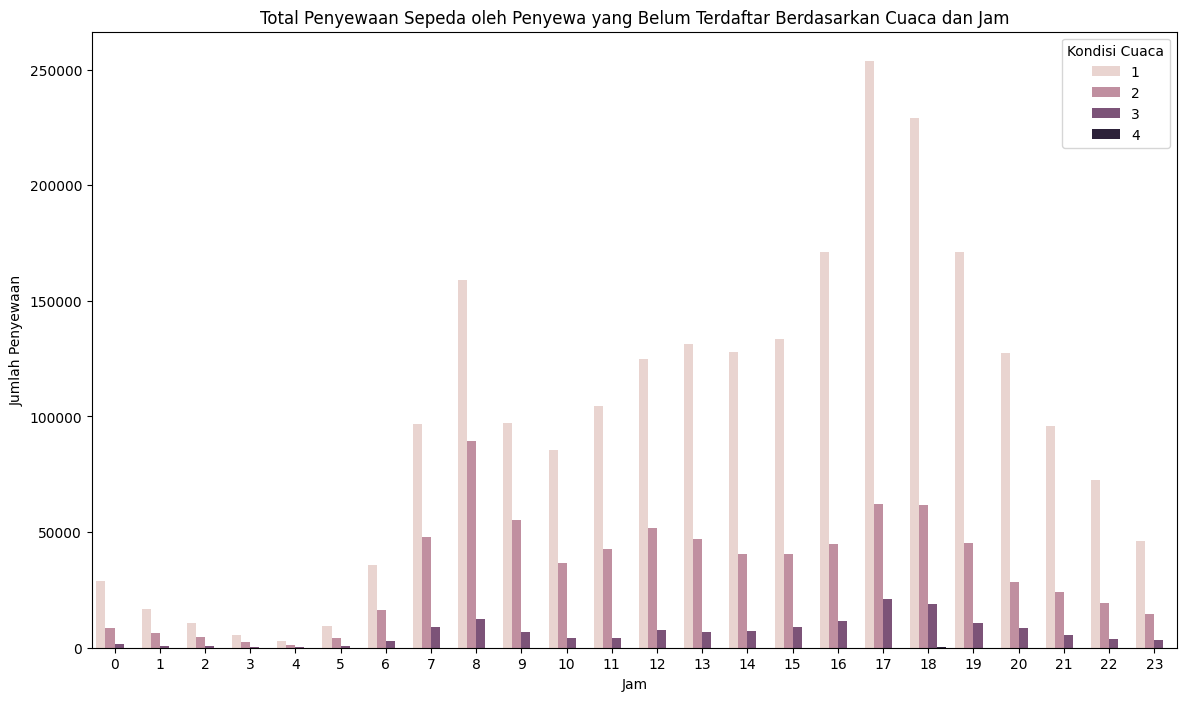

In [58]:
plt.figure(figsize=(14, 8))
sns.barplot(data=total_by_weather_hour, x='hour', y='count', hue='weather_situation')
plt.title('Total Penyewaan Sepeda oleh Penyewa yang Belum Terdaftar Berdasarkan Cuaca dan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Kondisi Cuaca')
plt.show()

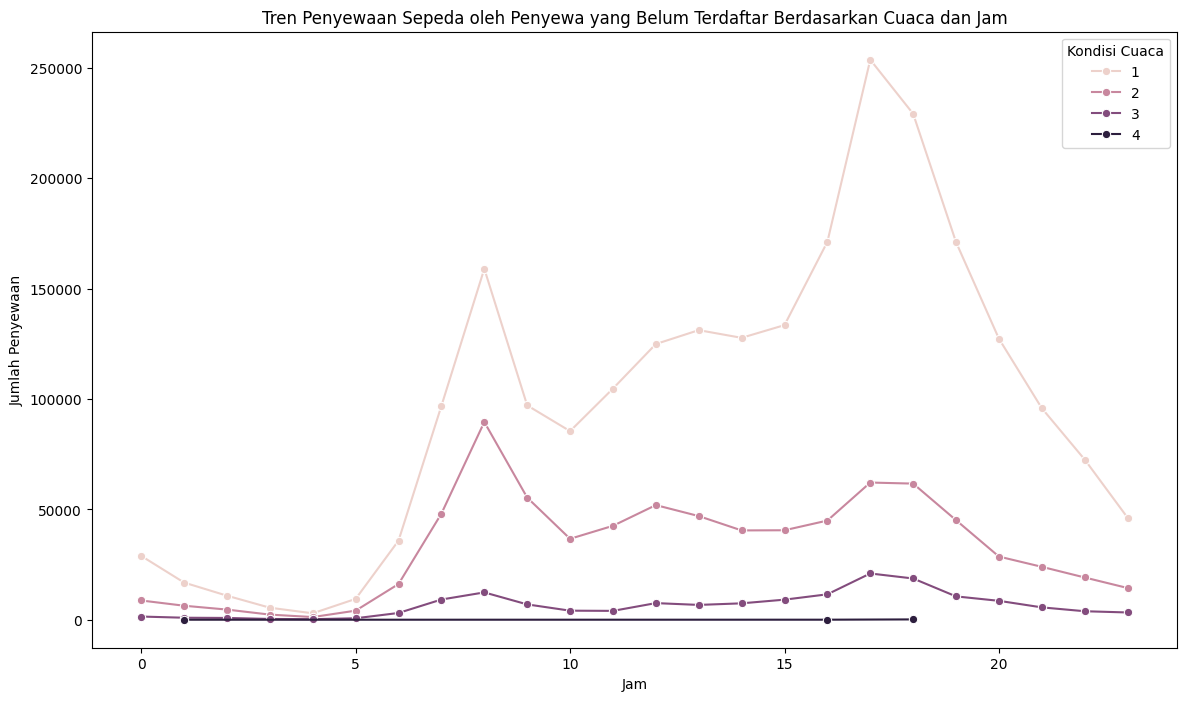

In [59]:

plt.figure(figsize=(14, 8))
sns.lineplot(data=total_by_weather_hour, x='hour', y='count', hue='weather_situation', marker='o')
plt.title('Tren Penyewaan Sepeda oleh Penyewa yang Belum Terdaftar Berdasarkan Cuaca dan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Kondisi Cuaca')
plt.show()


### Pertanyaan 2:

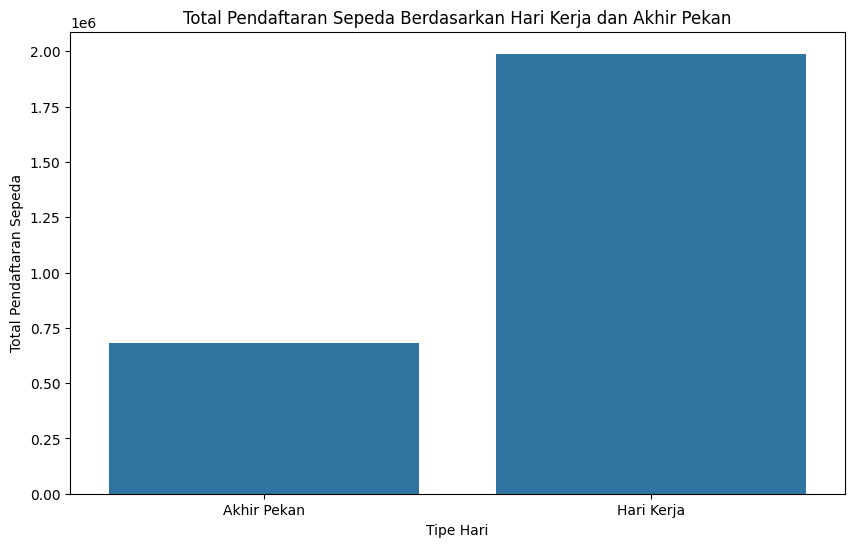

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='registered', data=total_registered)
plt.title('Total Pendaftaran Sepeda Berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Total Pendaftaran Sepeda')
plt.show()

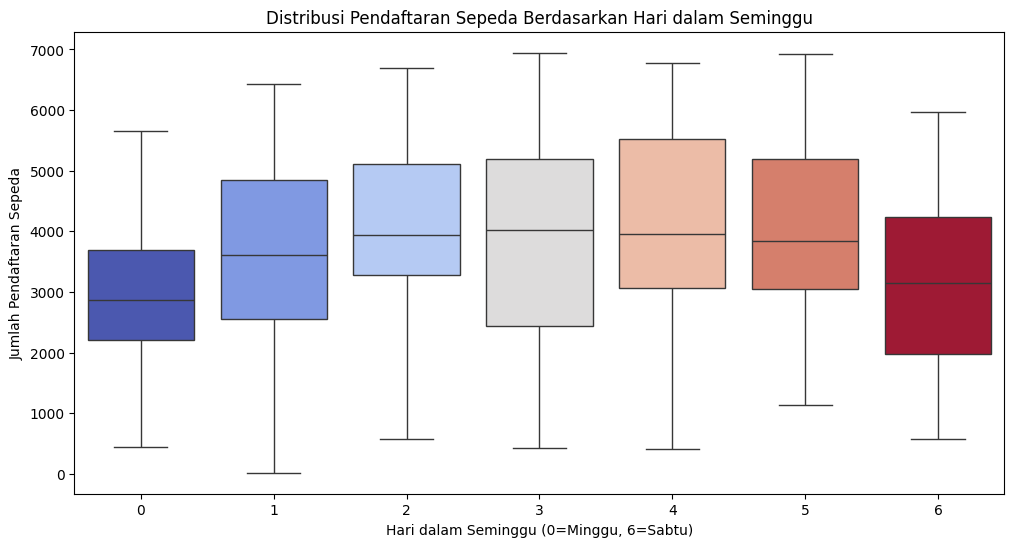

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='registered', data=day_df, palette='coolwarm', hue='weekday', legend=False)
plt.title('Distribusi Pendaftaran Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0=Minggu, 6=Sabtu)')
plt.ylabel('Jumlah Pendaftaran Sepeda')
plt.show()



## Conclusion

- Pengaruh Cuaca Terhadap Penyewaan Sepeda:

1. Cuaca baik (weather_situation = 1) cenderung memiliki jumlah penyewaan tertinggi pada jam-jam sibuk, seperti pagi hari (07:00-09:00) dan sore hari (17:00-19:00).
2. Cuaca buruk (weather_situation = 4) memiliki jumlah penyewaan paling sedikit, terutama pada jam-jam yang lebih awal, seperti jam 01:00, yang menunjukkan bahwa pengguna non-member menghindari bersepeda saat cuaca sangat buruk.
3. Dari visualisasi, terlihat pola bahwa semakin buruk cuaca, semakin sedikit jumlah penyewaan sepeda, terutama pada jam-jam di luar jam sibuk



- Bagaimana pengaruh Total Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan yang sudah terdaftar menjadi member 
1. Jumlah penyewaan sepeda jauh lebih tinggi pada hari kerja dibandingkan akhir pekan, dengan total penyewaan pada hari kerja mencapai 1.989.125 dibandingkan dengan 683.537 pada akhir pekan.
2. Analisis berdasarkan hari dalam seminggu menunjukkan bahwa hari Kamis dan Rabu memiliki rata-rata penyewaan tertinggi, sementara hari Minggu menunjukkan jumlah penyewaan terendah. Visualisasi data menunjukkan bahwa pendaftaran sepeda lebih konsisten dan tinggi pada hari kerja dan cenderung menurun pada akhir pekan

In [62]:
all_df = pd.concat([hour_df,day_df])
all_df.to_csv("C:\\Users\\M Fauzan Lubada\\Pictures\\Bike-sharing-dataset\\allll_data.csv", index=False)